# Netflix EDA
### Dataset: https://www.kaggle.com/datasets/shivamb/netflix-shows

In [105]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
data = pd.read_csv('D:/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [11]:
# Changing dtype for 'date_added' from object to datetime
data = pd.read_csv('D:/netflix_titles.csv')
data["date_added"] = pd.to_datetime(data["date_added"].str.strip(), format='%B %d, %Y')

In [12]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

## Anayzing date

<AxesSubplot:>

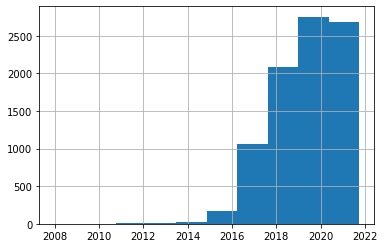

In [16]:
# Histogram of adding date and release year of movies and TV shows on Netflix in Matplotlib
data["date_added"].hist()

<AxesSubplot:>

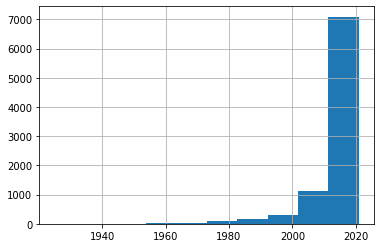

In [17]:
data["release_year"].hist()

In [106]:
# Interactive version using Plotly
px.histogram(data["date_added"])

In [107]:
px.histogram(data["release_year"], color_discrete_map={0:'red'})

In [108]:
# Extracting months
# Filling NaN values with 0
data["month_added"] = data["date_added"].dt.month.fillna(0)
px.histogram(data["date_added"], color=data["month_added"])

In [109]:
data["day_added"] = data["date_added"].dt.day.fillna(0)
px.histogram(data["day_added"])  # it looks like Netflix is usually replenishes their catalog on first day of the month 

## String features analysis

In [38]:
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

<AxesSubplot:>

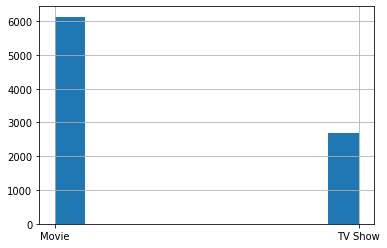

In [40]:
data['type'].hist() # As we can see here, there are almost twice as many movies in the catalog as there are TV shows

In [63]:
data['country'].unique() 
# There are a lot of movies where 'country' column was specified as a list of several countries
# which makes one country appear multiple times even after using .unique() function
# Let's fix that

array(['United States', 'South Africa', 0, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingd

In [74]:
countries = data.copy()
countries = pd.concat([countries, data['country'].str.split(",", expand=True)], axis=1)
countries = countries.melt(id_vars=['type', 'title'], value_vars=range(12), value_name='Country')
countries = countries[countries["Country"].notna()]
countries["Country"] = countries["Country"].str.strip()
countries

,type,title,variable,Country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


In [110]:
px.histogram(countries, 'Country', color='type').update_xaxes(categoryorder='total descending')